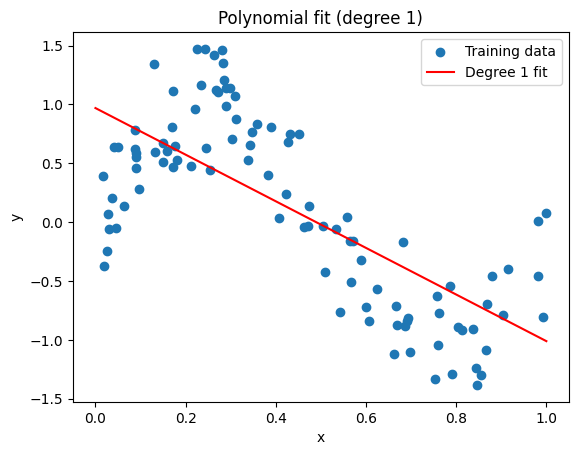

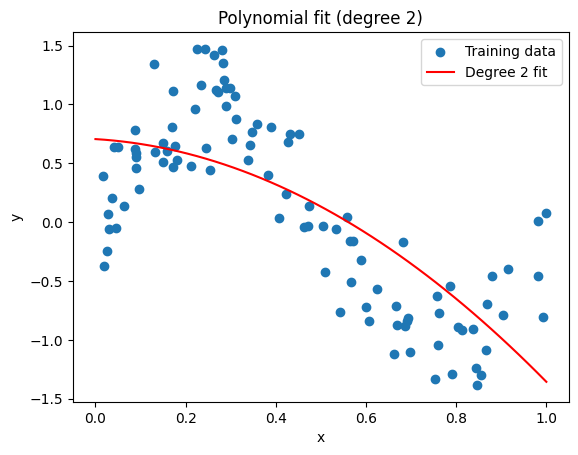

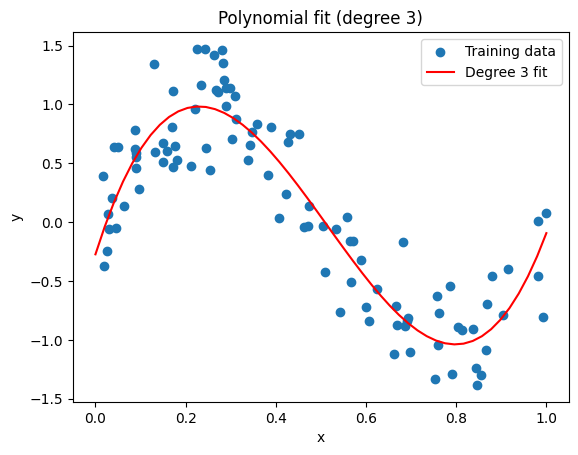

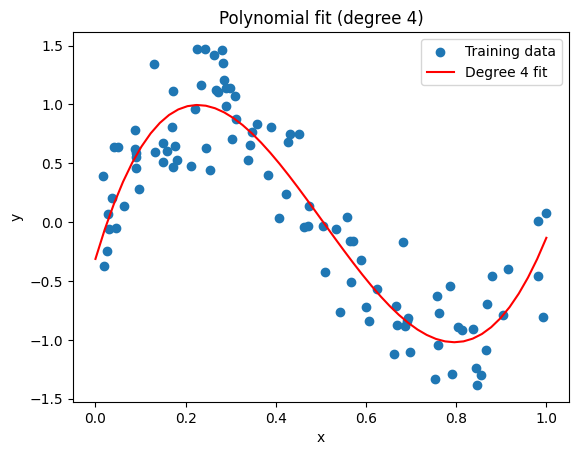

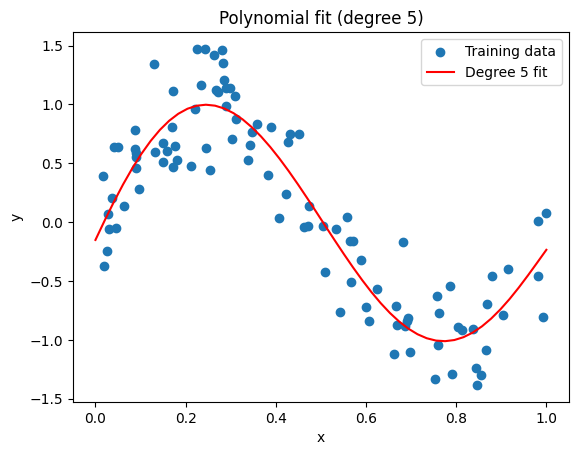

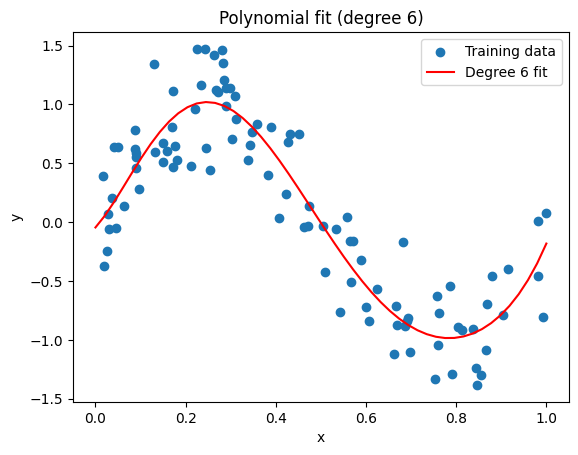

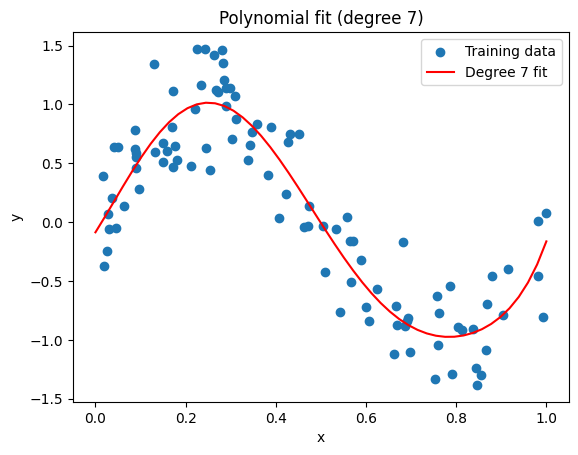

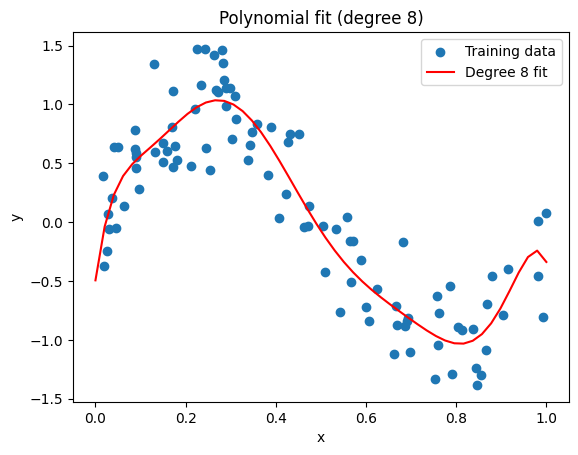

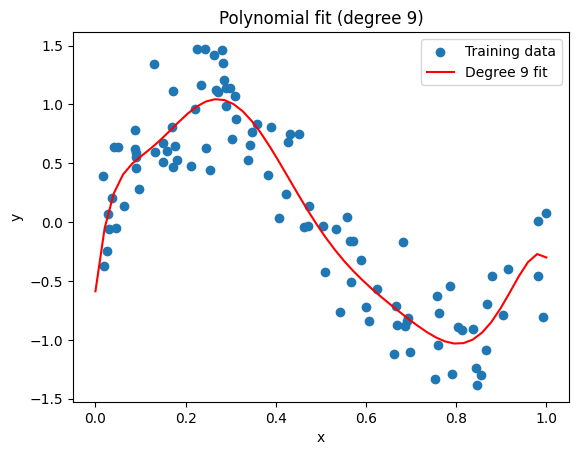

In [2]:
#Activity 1
import numpy as np
import matplotlib.pyplot as plt
N = 100

x = np.random.uniform(0, 1, N)
xx = np.linspace(0,1)
noise = np.random.normal(0, 0.3, N)
y = np.sin(2 * np.pi * x) + noise

#Polynomial fitting
for M in range(1, 10):
    coeffs = np.polyfit(x, y, M)
    poly = np.poly1d(coeffs)
    y_fit = poly(xx)

    plt.figure()
    plt.scatter(x, y, label="Training data")
    plt.plot(xx, y_fit, label=f"Degree {M} fit", color = 'red')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Polynomial fit (degree {M})")
    plt.legend()
    plt.show()


#### a)
When the number of data points is small, for example, N=10, we see that as the polynomial order increases, we don't get a better fit, but as we increase the number of data points by increasing the polynomial order, we will see a better fit and increasing the size of the data set reduces the over-fitting problem.

In [11]:
#Activity 1- part b)
#comparing erms with sigma for M=9 and N=100

M = 9
coeffs = np.polyfit(x, y, M)
poly = np.poly1d(coeffs)
y_pred = poly(x)

erms = np.sqrt(np.mean((y_pred - y)**2))
print("Noise sigma:", 0.3)
print("ERMS of model:", erms)

Noise sigma: 0.3
ERMS of model: 0.28542749685232754


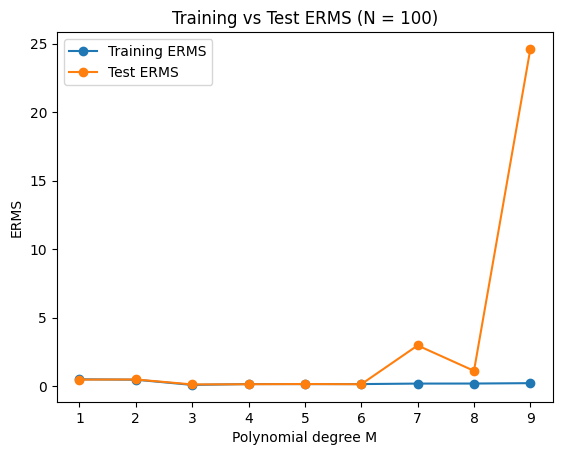

In [4]:
#Activity 1- part c)
#train and test of erms
from sklearn.model_selection import train_test_split

# split data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.75, random_state=0
)

erms_train = []
erms_test = []

for M in range(1, 10):
    p = np.poly1d(np.polyfit(x_train, y_train, M))

    erms_train.append(
        np.sqrt(np.mean((p(x_train) - np.sin(2*np.pi*x_train))**2))
    )
    erms_test.append(
        np.sqrt(np.mean((p(x_test) - np.sin(2*np.pi*x_test))**2))
    )
plt.figure()
plt.plot(range(1, 10), erms_train, 'o-', label="Training ERMS")
plt.plot(range(1, 10), erms_test, 'o-', label="Test ERMS")
plt.xlabel("Polynomial degree M")
plt.ylabel("ERMS")
plt.title("Training vs Test ERMS (N = 100)")
plt.legend()
plt.show()

/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


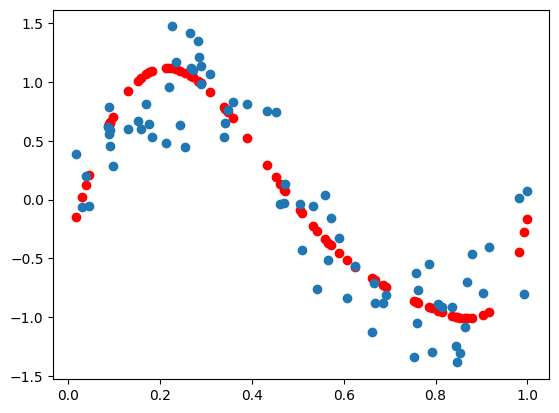

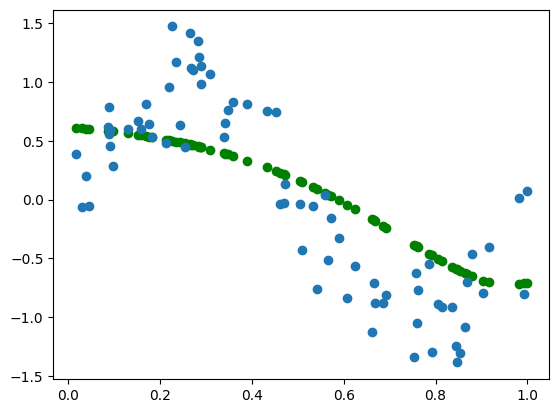

In [9]:
#Activity 2
#REGULARIZATION
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model1 = Pipeline([
    ("poly", PolynomialFeatures(degree = 9, include_bias =  False)),
    ("ridge", Ridge(alpha = 2**(-19)))
])

model2 = Pipeline([
    ("poly", PolynomialFeatures(degree = 9, include_bias =  False)),
    ("ridge", Ridge(alpha = 0.5))
])

model1.fit(x_train.reshape(-1,1), y_train)
y_pred1 = model1.predict(x_test.reshape(-1,1))
model2.fit(x_train.reshape(-1,1), y_train)
y_pred2 = model2.predict(x_test.reshape(-1,1))

#Plots
plt.scatter(x_test, y_pred1, label=f"ln λ = -18", color = 'red')
plt.scatter(x_test, y_test)
plt.show()

plt.scatter(x_test, y_pred2, label=f"ln λ = 0", color = 'green')
plt.scatter(x_test, y_test)
plt.show()

### Activity 2
#### a) Describe the underlying reason why fig. 1.7 (left) and (right) are so different.
In effect, λ controls the effective complexity of the model and hence determines the degree of over-fitting. If we use too large a value for λ, then we obtain a poor fit as in lnλ=0. Also, ln λ = −∞ corresponds to a model with no regularization.

/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hani/venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hani/venv/lib

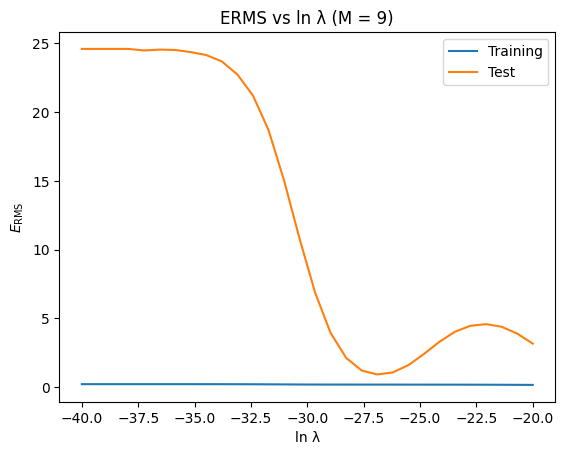

In [10]:
#Activity 2- part b)
ln_lambdas= np.linspace(-40, -20, 30)
erms_train_reg = []
erms_test_reg = []

for lnlam in ln_lambdas:
    lam = np.exp(lnlam)
    model = Pipeline([
        ("poly", PolynomialFeatures(degree = 9, include_bias =  False)),
        ("ridge", Ridge(alpha = lam))
    ])
    model.fit(x_train.reshape(-1,1), y_train)

    y_train_pred = model.predict(x_train.reshape(-1,1))
    y_test_pred  = model.predict(x_test.reshape(-1,1))

    erms_train_reg.append(
        np.sqrt(np.mean((y_train_pred - np.sin(2*np.pi*x_train))**2))
    )
    erms_test_reg.append(
        np.sqrt(np.mean((y_test_pred - np.sin(2*np.pi*x_test))**2))
    )

# -----------------------------
# Plot
# -----------------------------
plt.figure()
plt.plot(ln_lambdas, erms_train_reg, label="Training")
plt.plot(ln_lambdas, erms_test_reg, label="Test")
plt.xlabel("ln λ")
plt.ylabel(r"$E_{\mathrm{RMS}}$")
plt.title("ERMS vs ln λ (M = 9)")
plt.legend()
plt.show()

### Activity 2
#### b) Reproduce Fig. 1.8 and explain the reasons underlying the worse outcome when lambda is close to 0 or very high.
When λ ≈ 0 is very Small, we have no regularization, and the problem is overfitting.
The coefficients become very large (unconstrained), the model has complete freedom to wiggle through every data point, and creates wild oscillations between training points. It will fit the noise instead of the underlying pattern, and we will get low training error, but terrible generalization

When λ is very high (Over-regularization), the problem here is underfitting.
The coefficients are penalized too heavily and shrink toward zero; the model becomes too simple (nearly a flat line), and cannot capture the true sinusoidal pattern. We will get high training error and high test error.
Physical reason: The regularization term dominates, forcing the model to be so simple it can't even approximate the sine wave. It's like trying to draw a circle with only straight lines.

### Activity 3
Posterior probability: Probability obtained after observation.

                        P(contracting) = 0.001, P(+|A) = 0.98: Probability of testing positive given you have the disease.

                        P(+|notA) = 0.03: Probability of testing positive given you do not have the disease.

I guess we shouldn't be worried too much. Let’s see:

a) The likelihood function describes the probability of observing a test result given the disease status, here, P(+|A) and P(+|notA). They tell us how well the hypothesis (having A vs. not having A) predicts the observed data (positive test).

b) The Bayesian prior: This represents our belief before seeing the test result.
P(A) = 0.001,
P(notA) = 1 - 0.001 = 0.999
This shows the disease is so rare, affecting 1 in 1000 people.

c) The Normalization termUsing the Law of Total Probability: 
P(+) = P(+|A)P(A) + P(+|notA)P(notA)P(+) = (0.98)(0.001) + (0.03)(0.999)
P(+) = 0.03095
This shows all the ways we could get a positive (+) result.
The Posterior Probability using Bayes' Theorem:
P(A|+) =P(+|A)P(A)/P(+) = (0.98)(0.001)/0.03095 ~ 0.0317. About 3.17% 
Even though the test is 98% accurate at detecting the disease, a positive means only a 3.17% chance of having it. This is because the disease is so rare and the false positives of the 99.9% healthy people overcame the true positives of the 0.1% sick.

[0.34395822 0.33639419 0.32999691 0.32464383 0.32021464 0.31659346
 0.31367063 0.3113441  0.30952037 0.30811515 0.30705343 0.30626949
 0.30570645 0.30531581 0.30505679 0.30489564 0.30480485 0.30476251
 0.30475152 0.30475895 0.30477541 0.30479446 0.30481206 0.30482611
 0.30483604 0.30484237 0.30484641 0.30485    0.3048552  0.30486413
 0.30487876 0.30490085 0.30493178 0.30497251 0.30502358 0.30508503
 0.30515649 0.30523715 0.30532587 0.3054212  0.30552145 0.30562484
 0.30572948 0.30583356 0.30593533 0.30603325 0.30612598 0.30621249
 0.30629206 0.30636428 0.30642909 0.30648673 0.30653772 0.30658279
 0.30662286 0.30665893 0.306692   0.30672302 0.3067528  0.30678194
 0.30681077 0.30683936 0.30686748 0.30689463 0.30692013 0.30694319
 0.30696306 0.3069792  0.30699145 0.30700025 0.30700685 0.3070135
 0.30702361 0.30704182 0.307074   0.30712714 0.30720902 0.30732777
 0.30749118 0.3077058  0.30797588 0.30830212 0.30868037 0.3091004
 0.30954489 0.30998905 0.31040106 0.31074399 0.31097984 0.311076

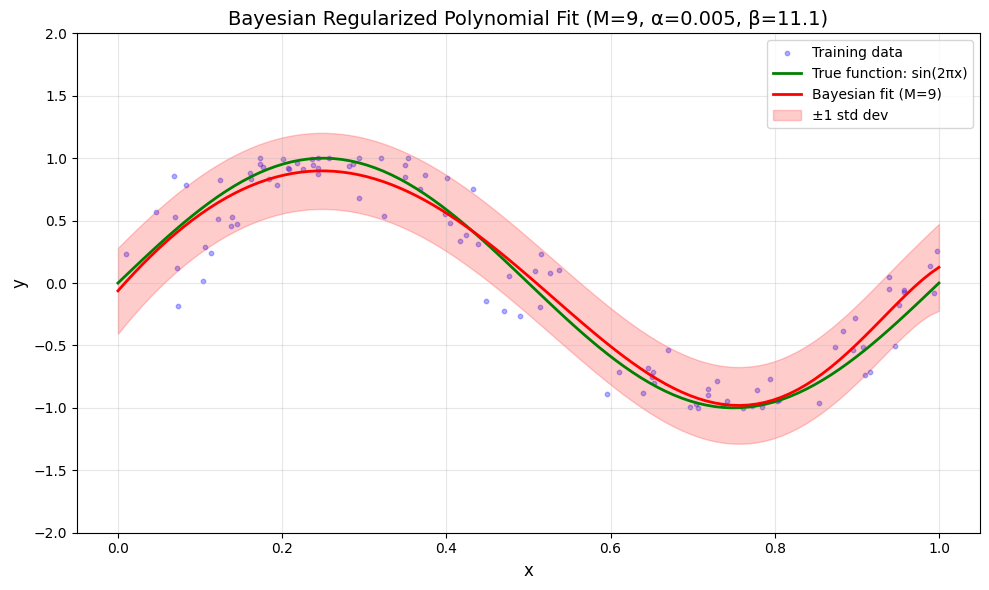

In [12]:
#Activity 4
# Uses α (alpha) to control how much we penalize large coefficients (regularization)
# Uses β (beta) to control how much we trust the data (inverse noise variance)
# Key formulas:

# m_N = β × S_N × Φ^T × t (formula 1.70) - gives us the mean coefficients
# S_N = (α×I + β×Φ^T×Φ)^(-1) (formula 1.72) - gives us the covariance (uncertainty)

#Where Φ is the design matrix (polynomial features).

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate data (from Activity 1)
N = 100
x = np.random.uniform(0, 1, N)
noise = np.random.normal(0.0, 0.3, N)
y = np.sin(2 * np.pi * x + noise)

# Step 2: Parameters from assignment
M = 9  # Polynomial degree
alpha = 5e-3  # 5 × 10^-3 (regularization parameter)
beta = 11.1   # Precision of noise

# Step 3: Create design matrix Φ (Phi)
# Each row is [1, x, x^2, x^3, ..., x^M] for polynomial basis
def design_matrix(x, M):
    N = len(x)
    Phi = np.zeros((N, M + 1))
    for i in range(M + 1):
        Phi[:, i] = x ** i
    return Phi

Phi = design_matrix(x, M)

# Step 4: Compute S_N (covariance matrix) - Formula 1.72
# S_N = (α*I + β*Φ^T*Φ)^(-1)
I = np.eye(M + 1)  # Identity matrix
S_N = np.linalg.inv(alpha * I + beta * Phi.T @ Phi)
# np.linalg.inv computes the matrix inverse, and @ performs matrix multiplication

# Step 5: Compute m_N (mean of posterior) - Formula 1.70
# m_N = β * S_N * Φ^T * t
m_N = beta * S_N @ Phi.T @ y

# Step 6: Make predictions for plotting
x_test = np.linspace(0, 1, 100)
Phi_test = design_matrix(x_test, M)
y_pred = Phi_test @ m_N

# Step 7: Compute predictive variance (for uncertainty bands)
# σ²(x) = 1/β + φ(x)^T * S_N * φ(x) - Formula 1.71
y_var = np.zeros(len(x_test))
for i in range(len(x_test)):
    phi_x = Phi_test[i, :]
    y_var[i] = 1/beta + phi_x.T @ S_N @ phi_x

y_std = np.sqrt(y_var)
print(y_std)

# Step 8: Plot results (similar to Figure 1.17)
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(x, y, alpha=0.3, s=10, color='blue', label='Training data')
# (This alpha here controls transparency.)


# Plot true function
x_true = np.linspace(0, 1, 100)
y_true = np.sin(2 * np.pi * x_true)
plt.plot(x_true, y_true, 'g-', linewidth=2, label='True function: sin(2πx)')

# Plot Bayesian prediction
plt.plot(x_test, y_pred, 'r-', linewidth=2, label=f'Bayesian fit (M={M})')

# Plot uncertainty (±1 standard deviation)
plt.fill_between(x_test, y_pred - y_std, y_pred + y_std, 
                 color='red', alpha=0.2, label='±1 std dev')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Bayesian Regularized Polynomial Fit (M={M}, α={alpha}, β={beta})', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()


#### a)
Parameter β corresponds to the inverse variance of the distribution, so β = 1/σ², and we added the standard deviation as σ = 0.3, so
β = 1/(0.3)² = 1/0.09 = 11.11. Higher β (like 100) → Low noise, high precision → Trust the data more. Lower β (like 1) → High noise, low precision → Trust the data less.
      

#### b) 
Compare this approach with the frequentist fitting approach.
    
In Frequentist Approach (Activity 1), the method minimizes the sum of squared errors directly and finds the single best coefficient values
that minimize error. There is no regularization, coefficients can become arbitrarily large, no uncertainty quantification, only point 
estimates with M=9 and N=1000, prone to overfitting (wild oscillations between data points)
It also assumes infinite confidence in the result, and the output is one fitted curve with no measure of uncertainty.

In Bayesian Approach (Activity 2), the method combines prior beliefs (α) with data likelihood (β) and finds a probability distribution over 
coefficients. Regularization (α): Penalizes large coefficients → smoother fit
Uncertainty quantification: Provides confidence bands showing where the model is uncertain
Less overfitting even with high M due to α controlling complexity
Incorporates noise level (β) explicitly in the model
Output: Mean prediction + uncertainty bands (±1 std dev)


Conclusion
The Bayesian approach (Section 1.2.6) provides a more robust solution by:
Preventing overfitting through regularization (α = 5×10⁻³)
Quantifying uncertainty in predictions
Incorporating domain knowledge about noise level (β = 11.1)
This results in smoother, more generalizable predictions with meaningful confidence intervals, whereas the frequentist approach would 
produce erratic oscillations when M=9.